In [92]:
import pandas as pd
import gc #garbage collector
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
df = pd.read_csv('../data/OxCGRT_Brazil_latest.csv', low_memory=False)

df.columns

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode', 'CityName',
       'CityCode', 'Jurisdiction', 'Date', 'C1_School closing', 'C1_Flag',
       'C1_Notes', 'C2_Workplace closing', 'C2_Flag', 'C2_Notes',
       'C3_Cancel public events', 'C3_Flag', 'C3_Notes',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C4_Notes',
       'C5_Close public transport', 'C5_Flag', 'C5_Notes',
       'C6_Stay at home requirements', 'C6_Flag', 'C6_Notes',
       'C7_Restrictions on internal movement', 'C7_Flag', 'C7_Notes',
       'C8_International travel controls', 'C8_Notes', 'E1_Income support',
       'E1_Flag', 'E1_Notes', 'E2_Debt/contract relief', 'E2_Notes',
       'E3_Fiscal measures', 'E3_Notes', 'E4_International support',
       'E4_Notes', 'H1_Public information campaigns', 'H1_Flag', 'H1_Notes',
       'H2_Testing policy', 'H2_Notes', 'H3_Contact tracing', 'H3_Notes',
       'H4_Emergency investment in healthcare', 'H4_Notes',
       'H5_Investment in vaccines', 'H5_Notes'

### H1_Public information campaigns:
- ordinal, possivelmente 'igual' ao H6

In [93]:
df_h1 = df[['CityName', 'Jurisdiction', 'Date', 'H1_Public information campaigns', 'H1_Flag', 'H1_Notes']]
df_h1 = df_h1.sort_values(by=['Date', 'CityName'])
df_h1

,CityName,Jurisdiction,Date,H1_Public information campaigns,H1_Flag,H1_Notes
97699,Ananindeua,CITY_GOV,20200101,0.0,NaN,NaN
98520,Ananindeua,CITY_TOTAL,20200101,0.0,NaN,NaN
99341,Ananindeua,CITY_WIDE,20200101,0.0,NaN,NaN
60754,Aparecida de Goiania,CITY_GOV,20200101,0.0,NaN,NaN
61575,Aparecida de Goiania,CITY_TOTAL,20200101,0.0,NaN,NaN
...,...,...,...,...,...,...
188008,NaN,STATE_TOTAL,20220331,NaN,NaN,NaN
188829,NaN,STATE_WIDE,20220331,NaN,NaN,NaN
194576,NaN,STATE_GOV,20220331,NaN,NaN,NaN
195397,NaN,STATE_TOTAL,20220331,NaN,NaN,NaN


In [94]:
#Remove City_GOV e city_wide q é sempre igual a city_gov
df_h1 = df_h1[df_h1.Jurisdiction.isin(['CITY_GOV', 'CITY_WIDE']) == False]

#Retira as entradas referentes ao Governo Federal e aos Estados
df_h1 = df_h1.dropna(axis=0, how='any', subset=['CityName'])

#dropa coluna jurisdiction pq n vai usar mais
df_h1 = df_h1.drop(columns=['Jurisdiction'])

#Converte coluna Date de INT para DATETIME
df_h1['Date'] = pd.to_datetime(df_h1['Date'], format='%Y%m%d')

#Como os NaN são dados interessantes, da replace neles por -1 para identificá-los
df_h1['H1_Public information campaigns'] = df_h1['H1_Public information campaigns'].fillna(-1)


In [95]:
df_h1[df_h1['H1_Public information campaigns'] >= 0]
#df_h1[df_h1['H1_Flag'] == 1]

,CityName,Date,H1_Public information campaigns,H1_Flag,H1_Notes
98520,Ananindeua,2020-01-01,0.0,NaN,NaN
61575,Aparecida de Goiania,2020-01-01,0.0,NaN,NaN
182262,Aracaju,2020-01-01,0.0,NaN,NaN
197040,Araguaina,2020-01-01,0.0,NaN,NaN
12315,Arapiraca,2020-01-01,0.0,NaN,NaN
...,...,...,...,...,...
192904,Sao Paulo,2022-03-01,2.0,1.0,NaN
126403,Teresina,2022-03-01,2.0,1.0,NaN
79606,Uberlandia,2022-03-01,2.0,1.0,NaN
54976,Vila Velha,2022-03-01,2.0,1.0,NaN


In [96]:
#Separa o dataset em trimestres
trimestres = [part for _, part in df_h1.groupby(pd.Grouper(key='Date',freq='QS'))]

print(str(len(trimestres)))
#trimestres[0][trimestres[0]['Date'] == '2020-01-01']
trimestres[1]

9


,CityName,Date,H1_Public information campaigns,H1_Flag,H1_Notes
98611,Ananindeua,2020-04-01,2.0,1.0,NaN
61666,Aparecida de Goiania,2020-04-01,2.0,1.0,NaN
182353,Aracaju,2020-04-01,2.0,1.0,NaN
197131,Araguaina,2020-04-01,2.0,1.0,NaN
12406,Arapiraca,2020-04-01,2.0,1.0,NaN
...,...,...,...,...,...
192295,Sao Paulo,2020-06-30,2.0,1.0,NaN
125794,Teresina,2020-06-30,2.0,1.0,NaN
78997,Uberlandia,2020-06-30,2.0,1.0,NaN
54367,Vila Velha,2020-06-30,2.0,1.0,NaN


In [97]:
new_df = []

for tri in trimestres:
    #Pega o valor mais comum (moda) do indicador 'H1' para cada cidade em um dado trimestre
    data_m = tri.groupby(['CityName'])['H1_Public information campaigns'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()

    #Determina qual o Trimestre que esse grupo representa
    data_m['Period'] = tri['Date'].dt.to_period('Q').reset_index()['Date']

    new_df.append(data_m)

a = 0

new_df = pd.concat(new_df)


new_df.head(-26)

,CityName,H1_Public information campaigns,Period
0,Ananindeua,2.0,2020Q1
1,Aparecida de Goiania,2.0,2020Q1
2,Aracaju,2.0,2020Q1
3,Araguaina,2.0,2020Q1
4,Arapiraca,2.0,2020Q1
...,...,...,...
23,Jaboatao dos Guararapes,2.0,2022Q1
24,Ji-Parana,2.0,2022Q1
25,Joao Pessoa,2.0,2022Q1
26,Joinville,2.0,2022Q1


In [98]:
#Agrupa por periodo e indíce do indicador e soma a quantidade de cidades
new_df = new_df.groupby(['Period','H1_Public information campaigns'])['CityName'].count().reset_index()
new_df

,Period,H1_Public information campaigns,CityName
0,2020Q1,-1.0,2
1,2020Q1,2.0,52
2,2020Q2,-1.0,1
3,2020Q2,2.0,53
4,2020Q3,-1.0,1
5,2020Q3,2.0,53
6,2020Q4,-1.0,1
7,2020Q4,2.0,53
8,2021Q1,-1.0,2
9,2021Q1,2.0,52


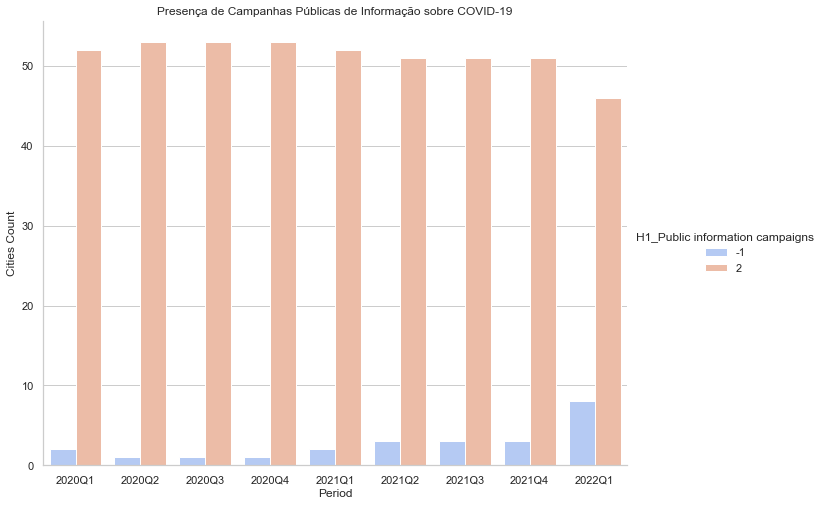

In [99]:
new_df['H1_Public information campaigns'] = new_df['H1_Public information campaigns'].astype('int')

plot = sns.catplot(data=new_df, x='Period', y='CityName', hue='H1_Public information campaigns', kind='bar', height=7, aspect=1.3, palette='coolwarm')
plot.set(title='Presença de Campanhas Públicas de Informação sobre COVID-19', ylabel='Cities Count')
plot

#pra saber o período que cada Quarter representa
#https://whatthequarter.com/

### H2_Testing policy:
- ordinal, possivelmente 'igual' ao H6

In [100]:
df_h2 = df[['CityName', 'Jurisdiction', 'Date', 'H2_Testing policy', 'H2_Notes']]
df_h2 = df_h2.sort_values(by=['Date', 'CityName'])
df_h2

,CityName,Jurisdiction,Date,H2_Testing policy,H2_Notes
97699,Ananindeua,CITY_GOV,20200101,0.0,NaN
98520,Ananindeua,CITY_TOTAL,20200101,0.0,NaN
99341,Ananindeua,CITY_WIDE,20200101,0.0,NaN
60754,Aparecida de Goiania,CITY_GOV,20200101,0.0,NaN
61575,Aparecida de Goiania,CITY_TOTAL,20200101,0.0,NaN
...,...,...,...,...,...
188008,NaN,STATE_TOTAL,20220331,NaN,NaN
188829,NaN,STATE_WIDE,20220331,NaN,NaN
194576,NaN,STATE_GOV,20220331,NaN,NaN
195397,NaN,STATE_TOTAL,20220331,NaN,NaN


In [101]:
#Remove City_GOV e city_wide q é sempre igual a city_gov
df_h2 = df_h2[df_h2.Jurisdiction.isin(['CITY_GOV', 'CITY_WIDE']) == False]

#Retira as entradas referentes ao Governo Federal e aos Estados
df_h2 = df_h2.dropna(axis=0, how='any', subset=['CityName'])

#dropa coluna jurisdiction pq n vai usar mais
df_h2 = df_h2.drop(columns=['Jurisdiction'])

#Converte coluna Date de INT para DATETIME
df_h2['Date'] = pd.to_datetime(df_h2['Date'], format='%Y%m%d')

#Como os NaN são dados interessantes, da replace neles por -1 para identificá-los
df_h2['H2_Testing policy'] = df_h2['H2_Testing policy'].fillna(-1)


In [102]:
df_h2

,CityName,Date,H2_Testing policy,H2_Notes
98520,Ananindeua,2020-01-01,0.0,NaN
61575,Aparecida de Goiania,2020-01-01,0.0,NaN
182262,Aracaju,2020-01-01,0.0,NaN
197040,Araguaina,2020-01-01,0.0,NaN
12315,Arapiraca,2020-01-01,0.0,NaN
...,...,...,...,...
192934,Sao Paulo,2022-03-31,-1.0,NaN
126433,Teresina,2022-03-31,-1.0,NaN
79636,Uberlandia,2022-03-31,-1.0,NaN
55006,Vila Velha,2022-03-31,-1.0,NaN


In [103]:
#Separa o dataset em trimestres
trimestres = [part for _, part in df_h2.groupby(pd.Grouper(key='Date',freq='QS'))]

print(str(len(trimestres)))
#trimestres[0][trimestres[0]['Date'] == '2020-01-01']
trimestres[1]

9


,CityName,Date,H2_Testing policy,H2_Notes
98611,Ananindeua,2020-04-01,0.0,NaN
61666,Aparecida de Goiania,2020-04-01,0.0,NaN
182353,Aracaju,2020-04-01,1.0,NaN
197131,Araguaina,2020-04-01,1.0,NaN
12406,Arapiraca,2020-04-01,1.0,NaN
...,...,...,...,...
192295,Sao Paulo,2020-06-30,2.0,NaN
125794,Teresina,2020-06-30,2.0,NaN
78997,Uberlandia,2020-06-30,2.0,NaN
54367,Vila Velha,2020-06-30,2.0,NaN


In [104]:
new_df = []

for tri in trimestres:
    #Pega o valor mais comum (moda) do indicador 'H1' para cada cidade em um dado trimestre
    data_m = tri.groupby(['CityName'])['H2_Testing policy'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()

    #Determina qual o Trimestre que esse grupo representa
    data_m['Period'] = tri['Date'].dt.to_period('Q').reset_index()['Date']

    new_df.append(data_m)

a = 0

new_df = pd.concat(new_df)


new_df.head(-26)

,CityName,H2_Testing policy,Period
0,Ananindeua,0.0,2020Q1
1,Aparecida de Goiania,0.0,2020Q1
2,Aracaju,0.0,2020Q1
3,Araguaina,0.0,2020Q1
4,Arapiraca,0.0,2020Q1
...,...,...,...
23,Jaboatao dos Guararapes,2.0,2022Q1
24,Ji-Parana,-1.0,2022Q1
25,Joao Pessoa,2.0,2022Q1
26,Joinville,2.0,2022Q1


In [105]:
#Agrupa por periodo e indíce do indicador e soma a quantidade de cidades
new_df = new_df.groupby(['Period','H2_Testing policy'])['CityName'].count().reset_index()
new_df

,Period,H2_Testing policy,CityName
0,2020Q1,-1.0,2
1,2020Q1,0.0,39
2,2020Q1,1.0,13
3,2020Q2,-1.0,1
4,2020Q2,2.0,53
5,2020Q3,-1.0,1
6,2020Q3,2.0,52
7,2020Q3,3.0,1
8,2020Q4,-1.0,1
9,2020Q4,2.0,48


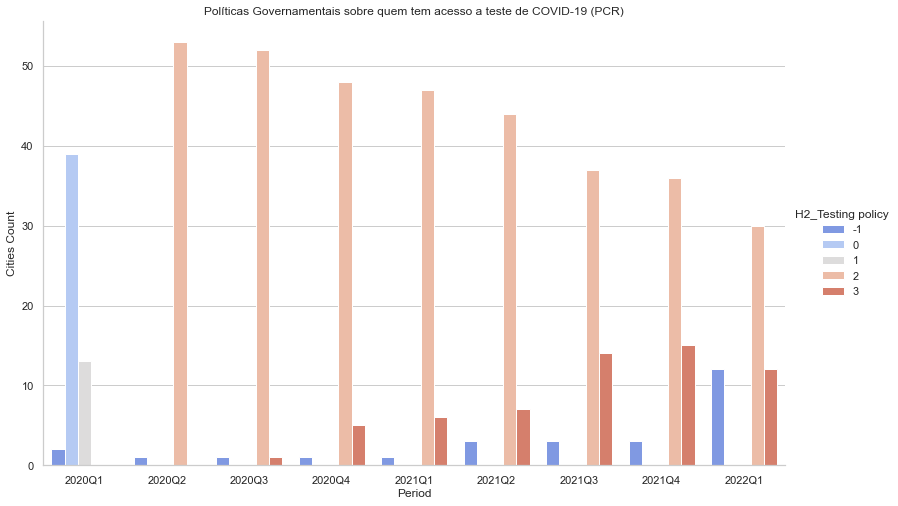

In [106]:
new_df['H2_Testing policy'] = new_df['H2_Testing policy'].astype('int')

plot = sns.catplot(data=new_df, x='Period', y='CityName', hue='H2_Testing policy', kind='bar', height=7, aspect=1.6, palette='coolwarm')
plot.set(title='Políticas Governamentais sobre quem tem acesso a teste de COVID-19 (PCR)', ylabel='Cities Count')
plot

#pra saber o período que cada Quarter representa
#https://whatthequarter.com/

### H3_Contact tracing:
- ordinal, possivelmente 'igual' ao H6

### H4_Emergency investment in healthcare:
- USD, pouco dado, porém bastante datas que o Governo Federal investiu, além de 4 dadas do RS e 1 de SC
- Separado as datas e investimento referente ao Gov. e plotado

In [107]:
df_h4 = df[['RegionName', 'CityName', 'Jurisdiction', 'Date', 'H4_Emergency investment in healthcare', 'H4_Notes', 'ConfirmedCases', 'ConfirmedDeaths']]
df_h4 = df_h4[df_h4['H4_Emergency investment in healthcare'].notna()]
df_h4 = df_h4[df_h4['H4_Emergency investment in healthcare'] != 0]
df_h4

,RegionName,CityName,Jurisdiction,Date,H4_Emergency investment in healthcare,H4_Notes,ConfirmedCases,ConfirmedDeaths
898,NaN,NaN,NAT_TOTAL,20200318,8.788437e+08,"Federal government announces R$ 4,5 million fr...",372.0,3.0
903,NaN,NaN,NAT_TOTAL,20200323,1.560250e+09,From the total package announced by the federa...,1924.0,34.0
911,NaN,NaN,NAT_TOTAL,20200331,1.870450e+08,https://www.saude.gov.br/noticias/agencia-saud...,5717.0,201.0
913,NaN,NaN,NAT_TOTAL,20200402,9.191176e+06,Government announced a 50 million Reais invest...,8044.0,324.0
914,NaN,NaN,NAT_TOTAL,20200403,1.758230e+09,https://www.saude.gov.br/noticias/agencia-saud...,9056.0,359.0
919,NaN,NaN,NAT_TOTAL,20200408,6.317190e+07,https://www.saude.gov.br/noticias/agencia-saud...,16170.0,819.0
920,NaN,NaN,NAT_TOTAL,20200409,1.958820e+06,https://www.saude.gov.br/noticias/agencia-saud...,18092.0,950.0
921,NaN,NaN,NAT_TOTAL,20200410,7.835270e+08,https://www.saude.gov.br/noticias/agencia-saud...,19638.0,1057.0
922,NaN,NaN,NAT_TOTAL,20200411,2.355300e+06,https://paraiba.pb.gov.br/noticias/estado-pres...,20727.0,1124.0
924,NaN,NaN,NAT_TOTAL,20200413,5.015780e+07,https://www.saude.gov.br/noticias/agencia-saud...,23430.0,1328.0


In [108]:
#20210107
#Essa data é um outliner! Analisando os dados, percebemos que neste dia em específico a conversão do real para o dólar foi invertida.
print(df_h4[df_h4['Date'] == 20210107]['H4_Notes'].values)

['Decree no. 10,595/2021 authorized the Ministry of Health to spend an extra USD 107,519,910,094.8 on the pandemic. (exchange rate from Jan 7th)    Link:  https://web.archive.org/web/20210112013743/http://www.planalto.gov.br/ccivil_03/_Ato2019-2022/2021/Decreto/D10595.htm  ']


In [109]:
#Valor em reais correta na fonte:
#R$ 19.911.094.462,00 (dezenove bilhões novecentos e onze milhões noventa e quatro mil quatrocentos e sessenta e dois reais)
#Cotação do dólar nesta data: (https://economia.uol.com.br/noticias/redacao/2021/01/07/dolar-comercial-opera-em-alta-r-5357.htm)
#R$ 5,357 
#df.loc[ df[“column_name”] == “some_value”, “column_name”] = “value”
df_h4.loc[df_h4['Date'] == 20210107, 'H4_Emergency investment in healthcare'] = 19911094462 / 5.357
df_h4[df_h4['Date'] == 20210107]


,RegionName,CityName,Jurisdiction,Date,H4_Emergency investment in healthcare,H4_Notes,ConfirmedCases,ConfirmedDeaths
1193,NaN,NaN,NAT_TOTAL,20210107,3.716837e+09,"Decree no. 10,595/2021 authorized the Ministry...",7970112.0,200679.0


In [110]:
df_gov = df_h4[df_h4['Jurisdiction'] == 'NAT_TOTAL']
df_gov = df_gov[['Date', 'H4_Emergency investment in healthcare']]
df_gov = df_gov.sort_values('Date').reset_index(drop=True)

#Converte coluna Date de INT para DATETIME
df_gov['Date'] = pd.to_datetime(df_gov['Date'], format='%Y%m%d')

df_gov['H4_Emergency investment in healthcare'] = df_gov['H4_Emergency investment in healthcare'].cumsum()
df_gov['Investimento em bilhão (Dólar)'] = df_gov['H4_Emergency investment in healthcare'].apply(lambda x: x/1000000000)


df_gov


,Date,H4_Emergency investment in healthcare,Investimento em bilhão (Dólar)
0,2020-03-18,8.788437e+08,0.878844
1,2020-03-23,2.439093e+09,2.439093
2,2020-03-31,2.626138e+09,2.626138
3,2020-04-02,2.635329e+09,2.635329
4,2020-04-03,4.393559e+09,4.393559
5,2020-04-08,4.456731e+09,4.456731
6,2020-04-09,4.458690e+09,4.458690
7,2020-04-10,5.242217e+09,5.242217
8,2020-04-11,5.244572e+09,5.244572
9,2020-04-13,5.294730e+09,5.294730


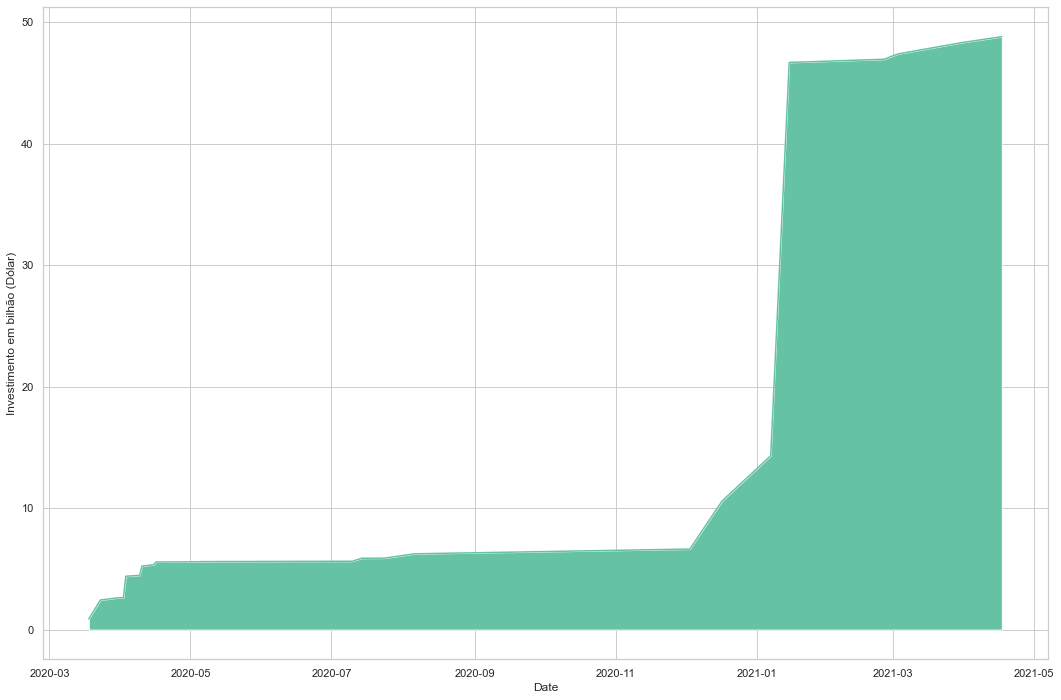

In [111]:
#plotar gráfico acumulado
sns.set(rc={"figure.figsize":(18, 12)})
sns.set_theme(style="whitegrid", palette='Set2')
sns.lineplot(data=df_gov, x='Date', y='Investimento em bilhão (Dólar)').fill_between(df_gov['Date'], df_gov['Investimento em bilhão (Dólar)'])

### H5_Investment in vaccines:
- unico dado que tem a respeito de H5_Investment in vaccines são duas datas/entry de investimento do Governo Federal

In [112]:
df_h5 = df[df['H5_Investment in vaccines'] > 0][['CountryName', 'Jurisdiction', 'Date', 'H5_Investment in vaccines', 'H5_Notes']]
df_h5

,CountryName,Jurisdiction,Date,H5_Investment in vaccines,H5_Notes
999,Brazil,NAT_TOTAL,20200627,127000000.0,https://web.archive.org/web/20200702163534/htt...
1242,Brazil,NAT_TOTAL,20210225,21930783.0,"Through Provisional Measure no. 1.032/2021, th..."


In [113]:
df_h5['H5_Notes'].values

array(['https://web.archive.org/web/20200702163534/https://www.gov.br/pt-br/noticias/saude-e-vigilancia-sanitaria/2020/06/brasil-entra-em-parceria-para-producao-de-vacina-contra-covid-19',
       'Through Provisional Measure no. 1.032/2021, the federal government allocated the amount to research at Fiocruz.    Link:  https://web.archive.org/web/20210319071621/https://www.in.gov.br/en/web/dou/-/medida-provisoria-n-1.032-de-24-de-fevereiro-de-2021-305292059  '],
      dtype=object)

### H6_Facial Coverings:
- Realizado limpeza, separação e plotagem

In [114]:
#Já foi feito, só trazer 'bonitinho' pra cá

### H7_Vaccination Policy:
- ordinal, possivelmente 'igual' ao H6

In [115]:
df_h7 = df[['CityName', 'Jurisdiction', 'Date', 'H7_Vaccination policy', 'H7_Flag', 'H7_Notes']]
df_h7 = df_h7.sort_values(by=['Date', 'CityName'])
df_h7

,CityName,Jurisdiction,Date,H7_Vaccination policy,H7_Flag,H7_Notes
97699,Ananindeua,CITY_GOV,20200101,0.0,NaN,NaN
98520,Ananindeua,CITY_TOTAL,20200101,0.0,NaN,NaN
99341,Ananindeua,CITY_WIDE,20200101,0.0,NaN,NaN
60754,Aparecida de Goiania,CITY_GOV,20200101,0.0,NaN,NaN
61575,Aparecida de Goiania,CITY_TOTAL,20200101,0.0,NaN,NaN
...,...,...,...,...,...,...
188008,NaN,STATE_TOTAL,20220331,NaN,NaN,NaN
188829,NaN,STATE_WIDE,20220331,NaN,NaN,NaN
194576,NaN,STATE_GOV,20220331,NaN,NaN,NaN
195397,NaN,STATE_TOTAL,20220331,NaN,NaN,NaN


In [116]:
#Remove City_GOV e city_wide q é sempre igual a city_gov
df_h7 = df_h7[df_h7.Jurisdiction.isin(['CITY_GOV', 'CITY_WIDE']) == False]

#Retira as entradas referentes ao Governo Federal e aos Estados
df_h7 = df_h7.dropna(axis=0, how='any', subset=['CityName'])

#dropa coluna jurisdiction pq n vai usar mais
df_h7 = df_h7.drop(columns=['Jurisdiction'])

#Converte coluna Date de INT para DATETIME
df_h7['Date'] = pd.to_datetime(df_h7['Date'], format='%Y%m%d')

#Como os NaN são dados interessantes, da replace neles por -1 para identificá-los
df_h7['H7_Vaccination policy'] = df_h7['H7_Vaccination policy'].fillna(-1)


In [117]:
df_h7

,CityName,Date,H7_Vaccination policy,H7_Flag,H7_Notes
98520,Ananindeua,2020-01-01,0.0,NaN,NaN
61575,Aparecida de Goiania,2020-01-01,0.0,NaN,NaN
182262,Aracaju,2020-01-01,0.0,NaN,NaN
197040,Araguaina,2020-01-01,0.0,NaN,NaN
12315,Arapiraca,2020-01-01,0.0,NaN,NaN
...,...,...,...,...,...
192934,Sao Paulo,2022-03-31,-1.0,NaN,NaN
126433,Teresina,2022-03-31,-1.0,NaN,NaN
79636,Uberlandia,2022-03-31,-1.0,NaN,NaN
55006,Vila Velha,2022-03-31,-1.0,NaN,NaN


In [118]:
#Separa o dataset em trimestres
trimestres = [part for _, part in df_h7.groupby(pd.Grouper(key='Date',freq='QS'))]

print(str(len(trimestres)))
#trimestres[0][trimestres[0]['Date'] == '2020-01-01']
trimestres[1]

9


,CityName,Date,H7_Vaccination policy,H7_Flag,H7_Notes
98611,Ananindeua,2020-04-01,0.0,NaN,NaN
61666,Aparecida de Goiania,2020-04-01,0.0,NaN,NaN
182353,Aracaju,2020-04-01,0.0,NaN,NaN
197131,Araguaina,2020-04-01,0.0,NaN,NaN
12406,Arapiraca,2020-04-01,0.0,NaN,NaN
...,...,...,...,...,...
192295,Sao Paulo,2020-06-30,0.0,NaN,NaN
125794,Teresina,2020-06-30,0.0,NaN,NaN
78997,Uberlandia,2020-06-30,0.0,NaN,NaN
54367,Vila Velha,2020-06-30,0.0,NaN,NaN


In [119]:
new_df = []

for tri in trimestres:
    #Pega o valor mais comum (moda) do indicador 'H1' para cada cidade em um dado trimestre
    data_m = tri.groupby(['CityName'])['H7_Vaccination policy'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()

    #Determina qual o Trimestre que esse grupo representa
    data_m['Period'] = tri['Date'].dt.to_period('Q').reset_index()['Date']

    new_df.append(data_m)

a = 0

new_df = pd.concat(new_df)


new_df.head(-26)

,CityName,H7_Vaccination policy,Period
0,Ananindeua,0.0,2020Q1
1,Aparecida de Goiania,0.0,2020Q1
2,Aracaju,0.0,2020Q1
3,Araguaina,0.0,2020Q1
4,Arapiraca,0.0,2020Q1
...,...,...,...
23,Jaboatao dos Guararapes,5.0,2022Q1
24,Ji-Parana,5.0,2022Q1
25,Joao Pessoa,5.0,2022Q1
26,Joinville,5.0,2022Q1


In [120]:
#Agrupa por periodo e indíce do indicador e soma a quantidade de cidades
new_df = new_df.groupby(['Period','H7_Vaccination policy'])['CityName'].count().reset_index()
new_df

,Period,H7_Vaccination policy,CityName
0,2020Q1,-1.0,2
1,2020Q1,0.0,52
2,2020Q2,-1.0,2
3,2020Q2,0.0,52
4,2020Q3,-1.0,2
5,2020Q3,0.0,52
6,2020Q4,-1.0,2
7,2020Q4,0.0,52
8,2021Q1,-1.0,2
9,2021Q1,3.0,50


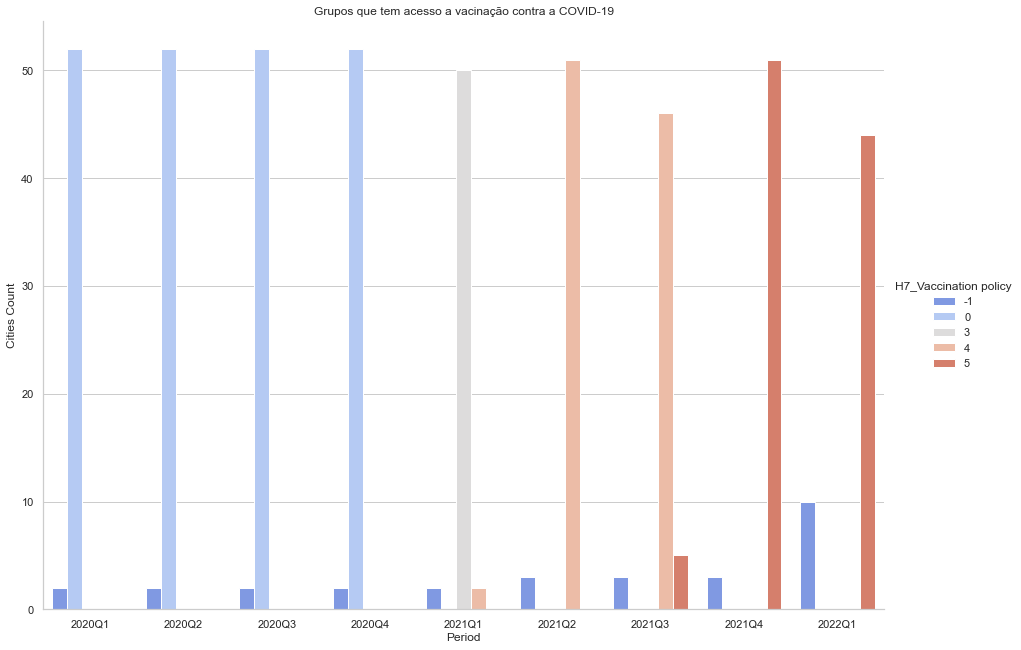

In [121]:
new_df['H7_Vaccination policy'] = new_df['H7_Vaccination policy'].astype('int')

plot = sns.catplot(data=new_df, x='Period', y='CityName', hue='H7_Vaccination policy', kind='bar', height=9, aspect=1.4, palette='coolwarm')
plot.set(title='Grupos que tem acesso a vacinação contra a COVID-19', ylabel='Cities Count')
plot

#pra saber o período que cada Quarter representa
#https://whatthequarter.com/